In [26]:
#include libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = 16, 8

In [27]:
#upload data building
buildings_data = pd.read_csv("building_metadata.csv")
#upload weather data
weather_data = pd.read_csv("weather_train.csv")
#upload energy data
energy_data = pd.read_csv("train.0.0.csv")

In [28]:
energy_data_indexed = energy_data.set_index("timestamp")

<Axes: xlabel='timestamp'>

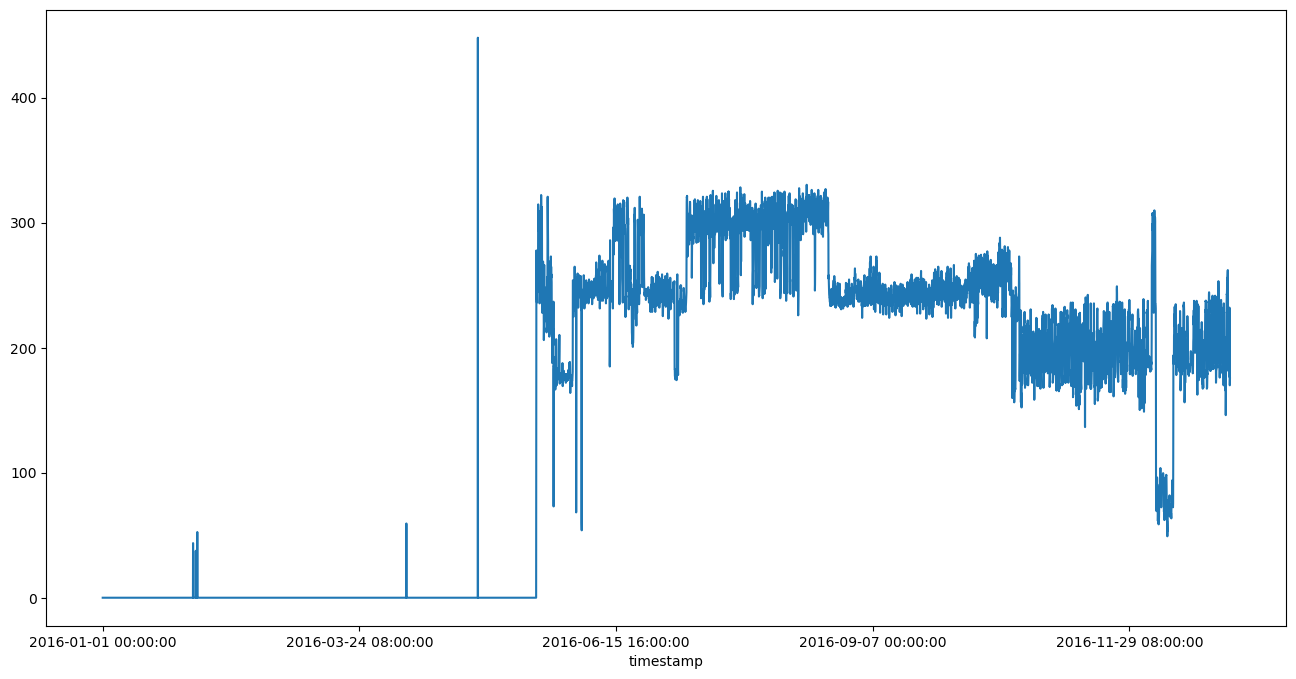

In [29]:
energy_data_indexed['meter_reading'].plot()

In [30]:
energy_data

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01 00:00:00,0.000
1,0,0,2016-01-01 01:00:00,0.000
2,0,0,2016-01-01 02:00:00,0.000
3,0,0,2016-01-01 03:00:00,0.000
4,0,0,2016-01-01 04:00:00,0.000
...,...,...,...,...
8779,0,0,2016-12-31 19:00:00,232.071
8780,0,0,2016-12-31 20:00:00,189.069
8781,0,0,2016-12-31 21:00:00,169.958
8782,0,0,2016-12-31 22:00:00,169.958


In [31]:
#merge energy and build info
data = pd.merge(left=buildings_data, right=energy_data, how="right", left_on="building_id", right_on="building_id")

In [32]:
weather_data

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,0,2016-01-01 01:00:00,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5
2,0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
3,0,2016-01-01 03:00:00,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
4,0,2016-01-01 04:00:00,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6
...,...,...,...,...,...,...,...,...,...
139768,15,2016-12-31 19:00:00,3.0,NaN,-8.0,NaN,NaN,180.0,5.7
139769,15,2016-12-31 20:00:00,2.8,2.0,-8.9,NaN,1007.4,180.0,7.7
139770,15,2016-12-31 21:00:00,2.8,NaN,-7.2,NaN,1007.5,180.0,5.1
139771,15,2016-12-31 22:00:00,2.2,NaN,-6.7,NaN,1008.0,170.0,4.6


In [33]:
data.set_index(["timestamp", "site_id"], inplace=True)
weather_data.set_index(["timestamp", "site_id"], inplace=True)

In [34]:
data = pd.merge(left=data,
               right=weather_data,
               how="left",
               left_index=True,
               right_index=True)
data.reset_index(inplace=True)

### how many missing values

In [35]:
def howManyZeros(df):
    for column in df.columns:
        data_nulls = df[column].isnull().sum()
        if data_nulls>0:
            print(column + ": " + str(data_nulls))

In [36]:
howManyZeros(data)

floor_count: 8784
air_temperature: 3
cloud_coverage: 3830
dew_temperature: 3
precip_depth_1_hr: 1
sea_level_pressure: 85
wind_direction: 250


### fill empty data

In [79]:
data["air_temperature"].fillna(0, inplace=True)
data["cloud_coverage"].fillna(0, inplace=True)
data["dew_temperature"].fillna(0, inplace=True)
data["precip_depth_1_hr"] = data["precip_depth_1_hr"].apply(lambda x:x if x>0 else 0)
sea_level_pressure_median = data['sea_level_pressure'].median()
wind_direction_pressure_median = data['wind_direction'].median()
data["sea_level_pressure"] = data["sea_level_pressure"].apply(lambda x: sea_level_pressure_mean if x != x else x) #NaN не дорівнює сам собі
data["wind_direction"] = data["wind_direction"].apply(lambda x: sea_level_pressure_mean if x != x else x) #NaN не дорівнює сам собі



In [83]:
howManyZeros(data)

floor_count: 8784
